In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [17]:
tablefile_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated"
tablefile_name = "TransientTable.csv"

tablefiles = [os.path.join(tablefile_dir, event_dir, tablefile_name) for event_dir in os.listdir(tablefile_dir) if os.path.exists(os.path.join(tablefile_dir, event_dir, tablefile_name) )]

print("\n".join(tablefiles))

/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_128.81_78.22_1256029553.7.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_180.36_39.26_1232131853.1.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_223.96_78.83_1293589370.8.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_246.05_72.19_1279930060.4.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_280.79_61.51_1256746189.7.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_282.73_33.19_1298013023.8.fits.gz/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-simulated/sim_282.73_45.09_1298677413.3.fits.

In [18]:
all_data = pd.DataFrame()

for file in tablefiles:
    #print(file)
    df_tmp = pd.read_csv(file, sep=";")
    #print(rate_tmp)
    all_data = pd.concat([all_data, df_tmp])

#all_data["Map name"]

In [19]:
alertcount_df = pd.DataFrame()

for map_name in all_data["Map name"].unique():
    #print(map_name)
    temp_df = all_data[all_data["Map name"] == map_name]
    new_temp_df = pd.DataFrame(temp_df[["Map name", "Unfiltered alerts", "Queried alerts", "Map area", "Map dist", "Map dist unc"]]).iloc[[0]]
    
    new_temp_df["Filtered alerts"] = len(temp_df)
    #print(new_temp_df)
    alertcount_df = pd.concat([alertcount_df, new_temp_df])

alertcount_df["Fraction queried"] = alertcount_df["Queried alerts"] / alertcount_df["Unfiltered alerts"]
alertcount_df["Fraction filtered"] = alertcount_df["Filtered alerts"] / alertcount_df["Unfiltered alerts"]


tmp_total_dict = {"Unfiltered": alertcount_df["Unfiltered alerts"].sum(),
                                    "Unfiltered mean": alertcount_df["Unfiltered alerts"].mean(),
                                    "Queried": alertcount_df["Queried alerts"].sum(),
                                    "Queried fraction mean": alertcount_df["Fraction queried"].mean(),
                                    "Filtered": alertcount_df["Filtered alerts"].sum(),
                                    "Filtered fraction mean": alertcount_df["Fraction filtered"].mean(),
                                    "Mean map area": alertcount_df["Map area"].mean(),
                                    "Mean map dist": alertcount_df["Map dist"].mean(),
                                    "Mean map dist unc": alertcount_df["Map dist unc"].mean()}

total_alertcount_df = pd.DataFrame.from_dict([tmp_total_dict])
total_alertcount_df["Fraction queried"] = total_alertcount_df["Queried"] / total_alertcount_df["Unfiltered"]
total_alertcount_df["Fraction filtered"] = total_alertcount_df["Filtered"] / total_alertcount_df["Unfiltered"]

print(len(alertcount_df))

total_alertcount_df



10


,Unfiltered,Unfiltered mean,Queried,Queried fraction mean,Filtered,Filtered fraction mean,Mean map area,Mean map dist,Mean map dist unc,Fraction queried,Fraction filtered
0,1815415,181541.5,153595,0.109678,122,0.000192,5039.202975,898.886303,274.105546,0.084606,0.000067


Index(['Filtered fraction mean', 'Queried fraction mean'], dtype='object')
[ 0.01915043 10.96779318]


[Text(0, 0, '0.0191504'), Text(0, 0, '10.9678')]

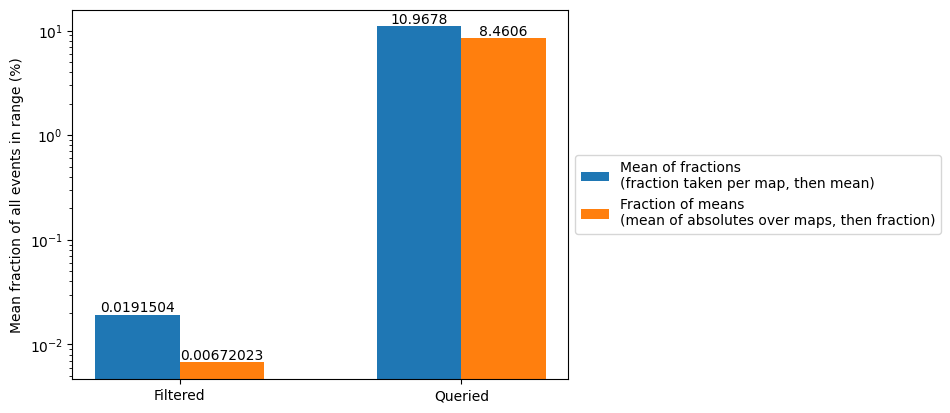

In [20]:
mean_df = total_alertcount_df[["Filtered fraction mean", "Queried fraction mean"]] * 100
total_frac_df = total_alertcount_df[["Fraction filtered", "Fraction queried"]] * 100

print(mean_df.keys())
print(mean_df.values[0])

xes = np.array([0, 1])
offset = 0.3

width = 0.3

xticks = ["Filtered", "Queried"]

rects_1 = plt.bar(xes, mean_df.values[0], label="Mean of fractions \n(fraction taken per map, then mean)", width=width)
rects_2 = plt.bar(xes + offset, total_frac_df.values[0], label="Fraction of means \n(mean of absolutes over maps, then fraction)", width=width)

plt.xticks(xes+width/2, xticks)

plt.yscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Mean fraction of all events in range (%)")


plt.bar_label(rects_2)
plt.bar_label(rects_1)


In [21]:


rate_df = pd.DataFrame()

for file in tablefiles:
    #print(file)
    df_tmp = pd.read_csv(file, sep=";")
    df_tmp["kn-1000-rate"] = np.array([np.count_nonzero(df_tmp["Kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["Kilonovaness"]]) / df_tmp["Map area"] * 1000

    rate_tmp = np.array([np.count_nonzero(df_tmp["Kilonovaness"] == kilonovaness) for kilonovaness in df_tmp["Kilonovaness"].unique()]) / df_tmp["Map area"][0] * 1000

    tmp_rate_df = pd.DataFrame({"Kilonovaness": df_tmp["Kilonovaness"].unique(),"kn-1000-rate": rate_tmp, "map_name": df_tmp["Map name"][0], "Map dist": df_tmp["Map dist"][0]})

    #print(rate_tmp)
    rate_df = pd.concat([rate_df, tmp_rate_df])


rate_df.head(20)

,Kilonovaness,kn-1000-rate,map_name,Map dist
0,20,0.491737,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
1,19,0.491737,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
2,18,0.983473,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
3,17,0.491737,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
4,16,0.983473,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
5,12,1.475210,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
6,11,2.950420,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
7,10,1.475210,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
8,9,1.475210,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112
9,8,0.491737,sim_128.81_78.22_1256029553.7.fits.gz,1477.046112


  Kilonovaness  rate-1000  std-1000 entries
0            1   0.276334  0.152759       4
0            3   0.651817  0.331656       2
0            6   0.320161  0.000000       1
0            8   0.446712  0.217990       3
0            9   0.864574  0.610636       2


/tmp/ipykernel_11332/3565148529.py:77: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


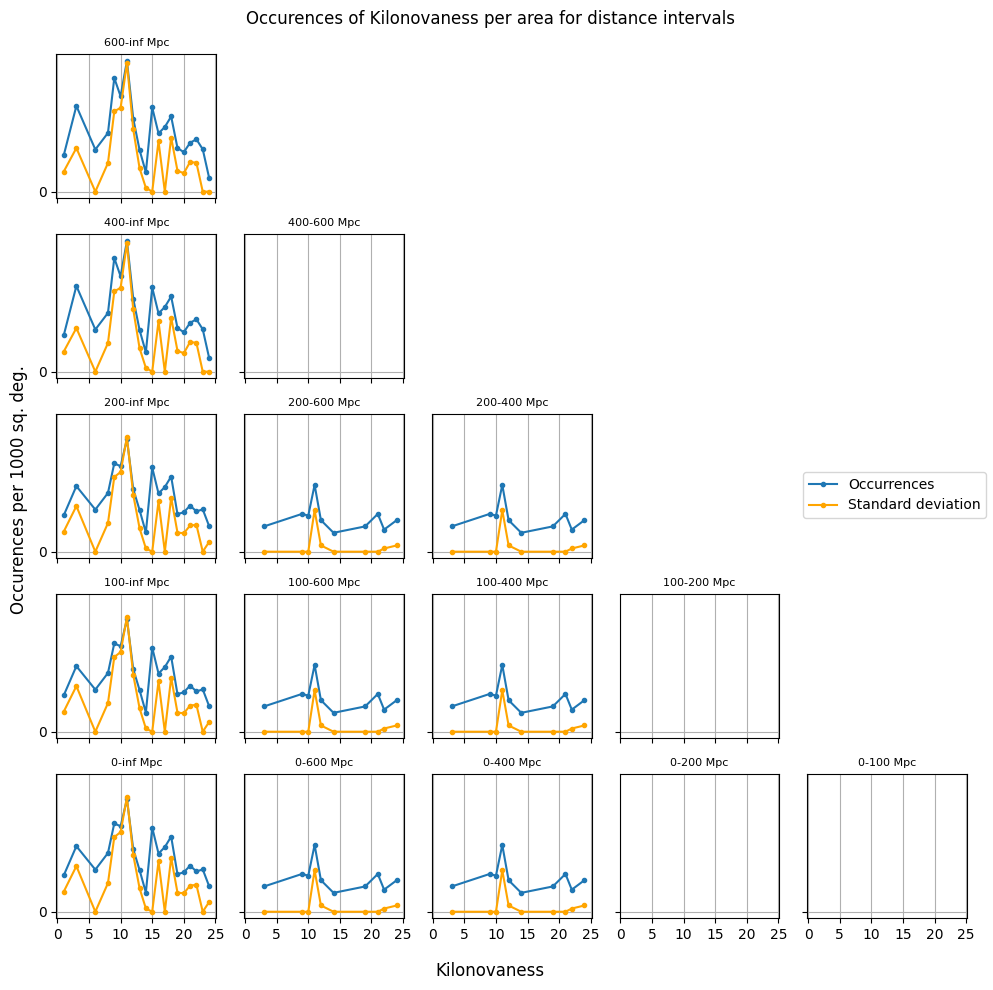

In [22]:
distance_mins = [0, 100, 200, 400, 600]
distance_maxs = [100, 200, 400,600, np.inf]
n = len(distance_mins)
m = len(distance_maxs)

binned_data = np.empty((n, m), dtype=pd.DataFrame)

#print(binned_data)

for k in range(n):
    for j in range(k, m):

        dist_min = distance_mins[k]
        dist_max = distance_maxs[j]
        #print(f"From {dist_min} to {dist_max} Mpc")


        kilonovaness_rate = pd.DataFrame(columns=["Kilonovaness", "rate-1000", "std-1000", "entries"])
        #print(kilonovaness_rate.head())
        #print(data["Kilonovaness"].unique())

        lim_data = rate_df[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]

        for kilonovaness in lim_data["Kilonovaness"].unique():
            #print(kilonovaness)
            tmp = lim_data[lim_data["Kilonovaness"] == kilonovaness]

            data_dict = {"Kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)]}
            #print(data_dict)
            mini_tmp = pd.DataFrame.from_dict(data_dict)

            kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
            kilonovaness_rate = kilonovaness_rate.sort_values(by=["Kilonovaness"], ascending=True)
        
        binned_data[k, j] = kilonovaness_rate
        
        # print(kilonovaness_rate)

print(kilonovaness_rate.head(5))

#print(binned_data)

fig, axs = plt.subplots(ncols=m, nrows=n, figsize=(10, 10),
                        layout="constrained", sharex=True, sharey=True, subplot_kw={"xticks": [0, 5, 10, 15, 20, 25], "yticks": [0, 5, 10, 15]})
# fill plots
for row in range(n):
    for col in range(m):
        if (binned_data[row, col] is not None):
            #print()
            axs[-row-1, -col-1].plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["rate-1000"], marker=".", label="Occurrences")
            #secax_x2 = axs[-row-1, -col-1].twinx()
            axs[-row-1, -col-1].plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange", label="Standard deviation")
            #secax_x2.plot(binned_data[row, col]["Kilonovaness"], binned_data[row, col]["std-1000"], marker=".", color="orange")
            axs[-row-1, -col-1].set_title(f"{distance_mins[row]}-{distance_maxs[col]} Mpc", fontsize=8)
            axs[-row-1, -col-1].grid()
        else:
            axs[-row-1, -col-1].set_visible(False)
        #pass

handles, labels = axs[-row-1, -col-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

fig.suptitle('Occurences of Kilonovaness per area for distance intervals')
fig.supxlabel("Kilonovaness")
fig.supylabel("Occurences per 1000 sq. deg.", ha="left")

# dummy axes 2 for right ylabel
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xticks([])
# ax.set_yticks([])
# [ax.spines[side].set_visible(False) for side in ('left', 'top', 'right', 'bottom')]
# ax.patch.set_visible(False)
# ax.yaxis.set_label_position('right')
# ax.set_ylabel('Standard deviation', labelpad=30, fontsize=12)


fig.tight_layout()
plt.show()


In [23]:
dist_min = 100
dist_max = 600
#print(f"From {dist_min} to {dist_max} Mpc")


kilonovaness_rate = pd.DataFrame(columns=["Kilonovaness", "rate-1000", "std-1000", "entries"])
#print(kilonovaness_rate.head())
#print(data["Kilonovaness"].unique())

lim_data = rate_df[np.logical_and(rate_df["Map dist"] >= dist_min, rate_df["Map dist"] < dist_max)]

lim_data.head()


for kilonovaness in lim_data["Kilonovaness"].unique()[:]:
    print("KILONVANESS:", kilonovaness)
    tmp = lim_data[lim_data["Kilonovaness"] == kilonovaness]
    print(tmp)

    print(tmp["kn-1000-rate"])
    print(tmp["Kilonovaness"])

    data_dict = {"Kilonovaness": [kilonovaness], "rate-1000": [np.mean(tmp["kn-1000-rate"].values)], "std-1000": [np.std(tmp["kn-1000-rate"].values)], "entries":[len(tmp["kn-1000-rate"].values)]}
    print(data_dict)
    mini_tmp = pd.DataFrame.from_dict(data_dict)

    kilonovaness_rate = pd.concat([kilonovaness_rate, mini_tmp])
    kilonovaness_rate = kilonovaness_rate.sort_values(by=["Kilonovaness"], ascending=True)
    print()

lim_data.head(20)

print(kilonovaness_rate)

KILONVANESS: 24
   Kilonovaness  kn-1000-rate                               map_name  \
0            24      0.287311  sim_282.73_33.19_1298013023.8.fits.gz   
0            24      0.192267  sim_315.34_51.13_1369124073.4.fits.gz   

     Map dist  
0  391.350357  
0  238.761796  
0    0.287311
0    0.192267
Name: kn-1000-rate, dtype: float64
0    24
0    24
Name: Kilonovaness, dtype: int64
{'Kilonovaness': [24], 'rate-1000': [0.23978888588979355], 'std-1000': [0.04752196597777228], 'entries': [2]}

KILONVANESS: 22
   Kilonovaness  kn-1000-rate                               map_name  \
1            22      0.143655  sim_282.73_33.19_1298013023.8.fits.gz   
1            22      0.192267  sim_315.34_51.13_1369124073.4.fits.gz   

     Map dist  
1  391.350357  
1  238.761796  
1    0.143655
1    0.192267
Name: kn-1000-rate, dtype: float64
1    22
1    22
Name: Kilonovaness, dtype: int64
{'Kilonovaness': [22], 'rate-1000': [0.16796117292290208], 'std-1000': [0.02430574698911918], 'entries'